In [11]:
from openpyxl import load_workbook
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import numpy as np
import gridgen_class_v2 as gc
import pandas as pd
import codecs
import bisect

%matplotlib inline

## Coal Mining Emissions

/usr/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:495: UserWarning: Using a range string is deprecated. Use ws[range_string]
  warn("Using a range string is deprecated. Use ws[range_string]")
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


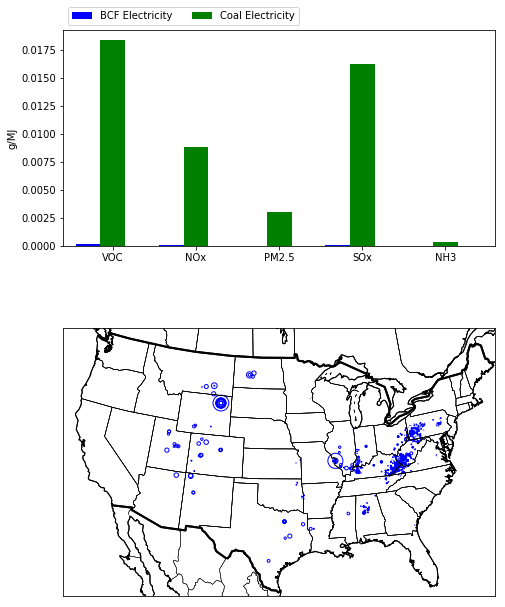

In [12]:
wb = load_workbook('../Data/coal mines.xlsx',data_only=True, read_only = True)
ws = wb['2008Pub']
ws2 = wb['Code Definitions']

lats = []
lons = []
prod = []

for row in ws.iter_rows('V2:Y'+str(ws.max_row)):
        prod.append(row[0].value)
        lats.append(row[2].value)
        lons.append(row[3].value)

mt = gc.Map(36)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_axes([0.2,0.6,0.6,0.3])
data = pd.read_csv('../Data/long_trans_emi.csv',index_col = 'category')
data2 = pd.read_csv('../Data/coal elec breakdown.csv',index_col = 'category')

lig = data.loc[['VOC','NOx','PM2.5','SOx','NH3'],'Coal mining']
coal = data2.loc[['VOC','NOx','PM2.5','SOx','NH3'],'Coal mining']
bar_l = np.arange(5)
bar_width = 0.3
bar1 = ax1.bar(bar_l,np.array(lig),width = bar_width,color = 'b')
bar2 = ax1.bar(bar_l+bar_width,np.array(coal), width = bar_width,color = 'g')
ax1.set_ylabel('g/MJ')
bar1.set_label('BCF Electricity')
bar2.set_label('Coal Electricity')
ax1.legend(bbox_to_anchor=(0., 1, 1.5, .102),loc = 3, ncol = 2)
ax1.set_xticks(bar_l+bar_width) 
ax1.set_xticklabels(['VOC','NOx','PM2.5','SOx','NH3'])
ax1.set_xlim([bar_l[0]-bar_width,bar_l[-1]+bar_width*3])

ax2 = fig.add_axes([0.2,0.05,0.6,0.5])
m = mt.GenMap()
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()
total = sum(prod)
prod = [p/total*3000 for p in prod]
x,y = m(lons,lats)

m.scatter(x,y,s = prod, facecolors = 'none',edgecolors = 'b')

## Corn Farming Emissions

/usr/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:495: UserWarning: Using a range string is deprecated. Use ws[range_string]
  warn("Using a range string is deprecated. Use ws[range_string]")
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:51: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


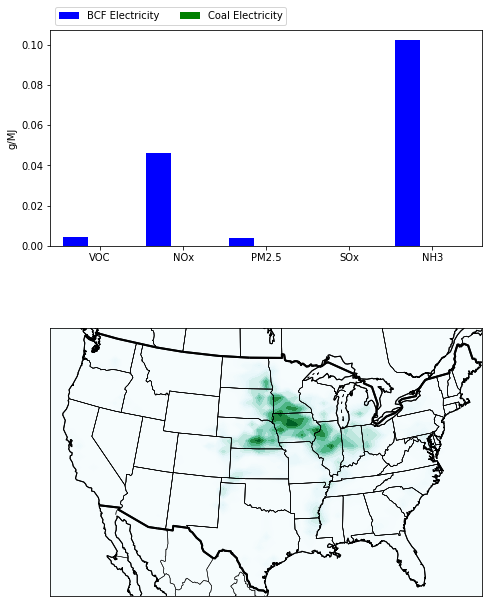

In [13]:
lon=[]
lat=[]
countyid=[]
with codecs.open('../Data/counties.txt', "r",encoding='utf-8', errors='ignore') as f:
    for line in f:
        line = line.strip()
        parts = line.split()
        try:
            temlat = float(parts[-2])
            temlon = float(parts[-1])
            lat.append(temlat)
            lon.append(temlon)
            countyid.append(parts[1])
        except:
            pass

position = list(zip(lat,lon))
counties_pos = list(zip(countyid,position))
pos_dic = dict(counties_pos)

clat=[]
clon=[]
cprod=[]
wb = load_workbook('../Data/2012 corn prod in bushel.xlsx',data_only=True, read_only = True)
ws = wb['corn']
fid = []
prod = []

for row in ws.iter_rows('T2:V'+str(ws.max_row)):
    try:
        float(row[0].value)
        fid.append(row[-1].value)
        prod.append(row[0].value)
    except:
        pass

for id, production in zip(fid, prod):
    if str(id) in pos_dic.keys():
        pin = pos_dic[str(id)]
        clat.append(pin[0])
        clon.append(pin[1])
        cprod.append(production)
        
mt = gc.Map(36)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_axes([0.2,0.6,0.6,0.3])
data = pd.read_csv('../Data/long_trans_emi.csv',index_col = 'category')
data2 = pd.read_csv('../Data/coal elec breakdown.csv',index_col = 'category')

lig = data.ix[['VOC','NOx','PM2.5','SOx','NH3'],'Corn farming']

coal = np.zeros(5)
bar_l = np.arange(5)
bar_width = 0.3
bar1 = ax1.bar(bar_l,np.array(lig),width = bar_width,color = 'b')
bar2 = ax1.bar(bar_l+bar_width,np.array(coal), width = bar_width,color = 'g')
ax1.set_ylabel('g/MJ')
bar1.set_label('BCF Electricity')
bar2.set_label('Coal Electricity')
ax1.legend(bbox_to_anchor=(0., 1, 1.5, .102),loc = 3, ncol = 2)
ax1.set_xticks(bar_l+bar_width) 
ax1.set_xticklabels(['VOC','NOx','PM2.5','SOx','NH3'])
ax1.set_xlim([bar_l[0]-bar_width, bar_l[-1]+3*bar_width])

ax2 = fig.add_axes([0.2,0.05,0.6,0.5])
m = mt.GenMap()
nc = 60
nr = 50
lons,lats,xx,yy=m.makegrid(nc+1,nr+1,returnxy = True)
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()
total = sum(cprod)

x,y = m(clon,clat)
x0 = xx[0,:]
y0 = yy[:,0]
cornp = np.zeros((nr+1, nc+1))
for xi, yi, cp in zip(x, y, cprod):
    xind=bisect.bisect_left(x0, xi)
    yind=bisect.bisect_left(y0, yi)
    if (yind<=nr)&(xind>=1):
        for n in range(5):
            cornp[yind-1][xind-1]+=cp/100000
clevs = [0,50,100,200,300,400,500,700,1000,1500,2000,2500,3000,4000,5000,6000]

cs = m.contourf(xx,yy,cornp,clevs, cmap=plt.cm.BuGn)


## Coal Combustion Emissions

/usr/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:495: UserWarning: Using a range string is deprecated. Use ws[range_string]
  warn("Using a range string is deprecated. Use ws[range_string]")
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basema

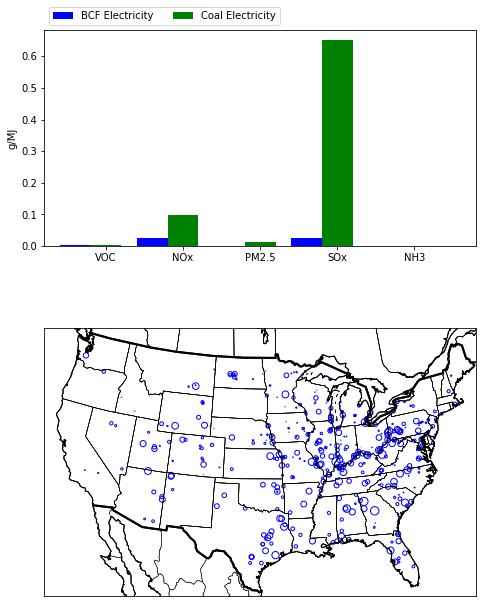

In [14]:
coalfip = []
lon = []
lat = []
prod = []

wbp = load_workbook('../Data/power plants.xlsx',data_only=True, read_only = True)
wsp = wbp['power']
for row in wsp.iter_rows('E2:U'+str(wsp.max_row)):
    if row[3].value > 0:
        prod.append(row[3].value)
        lon.append(row[-1].value)
        lat.append(row[-2].value)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_axes([0.2,0.6,0.6,0.3])
data = pd.read_csv('../Data/long_trans_emi.csv',index_col = 'category')
data2 = pd.read_csv('../Data/coal elec breakdown.csv',index_col = 'category')

lig = data.ix[['VOC','NOx','PM2.5','SOx','NH3'],'Coal comb.']
lig2 = data.ix[['VOC','NOx','PM2.5','SOx','NH3'], 'FP and BCF combustion']
coal = data2.ix[['VOC','NOx','PM2.5','SOx','NH3'],'Coal combustion']
bar_l = np.arange(5)
bar_width = 0.4
bar1 = ax1.bar(bar_l,np.array(lig)+np.array(lig2),width = bar_width,color = 'b')
bar2 = ax1.bar(bar_l+bar_width,np.array(coal), width = bar_width,color = 'g')
ax1.set_ylabel('g/MJ')
bar1.set_label('BCF Electricity')
bar2.set_label('Coal Electricity')
ax1.legend(bbox_to_anchor=(0., 1, 1.5, .102),loc = 3, ncol = 2)
ax1.set_xticks(bar_l+bar_width) 
ax1.set_xticklabels(['VOC','NOx','PM2.5','SOx','NH3'])
ax1.set_xlim([bar_l[0] - bar_width, bar_l[-1]+3*bar_width])

ax2 = fig.add_axes([0.2,0.05,0.6,0.5])
mt = gc.Map(36)
m = mt.GenMap()
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()
total = sum(prod)
prod = [p/total*6000 for p in prod]
x,y = m(lon, lat)

m.scatter(x,y,s = prod, facecolors = 'none',edgecolors = 'b')

## Sulfuric Acid Emissions

/usr/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:495: UserWarning: Using a range string is deprecated. Use ws[range_string]
  warn("Using a range string is deprecated. Use ws[range_string]")
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:40: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


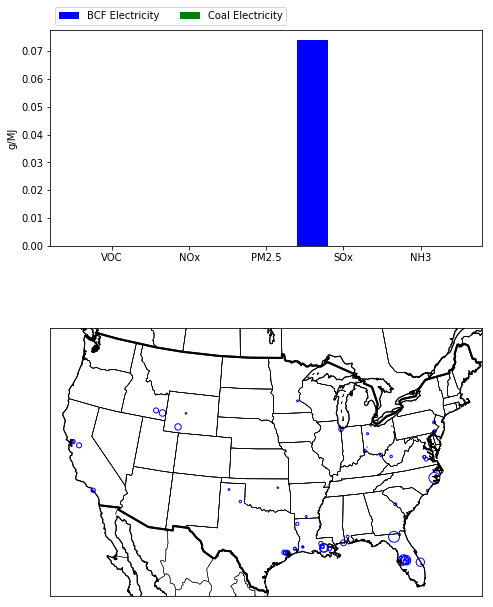

In [15]:
from fer_loc import ferplant
fer_dict = ferplant.fer_dict
fertilizer = load_workbook('../Data/fertilizer plants.xlsx',
                     data_only = True, read_only = True)
sacid = fertilizer['Sulfuric acid']
saloc = []
lons=[]
lats=[]
prod=[]

for row in sacid.iter_rows('A2:B40'):
    loc = row[0].value
    if loc != None:
        location = loc.split(';')
        for i, name in enumerate(location):
            if i == 0:
                name, state = name.split(',')[1:3]
            else:
                name, state = name.split(',')[0:2]
            name = name.strip()
            if 'total' not in name.lower():
                if name.lower() in fer_dict.keys():
                    try:
                        prod.append(float(row[-1].value/len(location)))
                        saloc.append(name)
                        lon, lat = fer_dict[name.lower()]
                        lons.append(lon)
                        lats.append(lat)
                    except:
                        pass
                else:
                    print(name.lower())

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_axes([0.2,0.6,0.6,0.3])
data = pd.read_csv('../Data/long_trans_emi.csv',index_col = 'category')
data2 = pd.read_csv('../Data/coal elec breakdown.csv',index_col = 'category')

lig = data.ix[['VOC','NOx','PM2.5','SOx','NH3'],'Sulfuric acid']
coal = np.zeros(5)
bar_l = np.arange(5)
bar_width = 0.4
bar1 = ax1.bar(bar_l,np.array(lig),width = bar_width,color = 'b')
bar2 = ax1.bar(bar_l+bar_width,np.array(coal), width = bar_width,color = 'g')
ax1.set_ylabel('g/MJ')
bar1.set_label('BCF Electricity')
bar2.set_label('Coal Electricity')
ax1.legend(bbox_to_anchor=(0., 1, 1.5, .102),loc = 3, ncol = 2)
ax1.set_xticks(bar_l+bar_width) 
ax1.set_xticklabels(['VOC','NOx','PM2.5','SOx','NH3'])
ax1.set_xlim([bar_l[0] - bar_width, bar_l[-1]+3*bar_width])

ax2 = fig.add_axes([0.2,0.05,0.6,0.5])
mt = gc.Map(36)
m = mt.GenMap()
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()
total = sum(prod)
prod = [p/total*1500 for p in prod]
x,y = m(lons, lats)

m.scatter(x,y,s = prod, facecolors = 'none',edgecolors = 'b')

## Transportation of stover

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


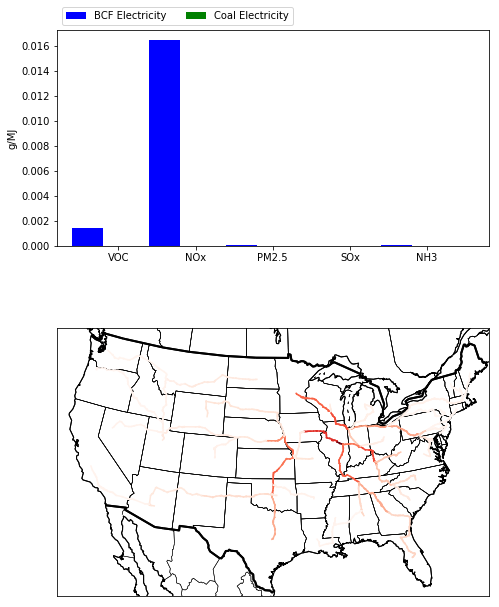

In [17]:
import numpy as np
import matplotlib
from openpyxl import load_workbook
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import gridgen_class_v2 as gc
import pandas as pd

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_axes([0.2,0.6,0.6,0.3])
data = pd.read_csv('../Data/long_trans_emi.csv',index_col = 'category')
data2 = pd.read_csv('../Data/coal elec breakdown.csv',index_col = 'category')
lig = data.ix[['VOC','NOx','PM2.5','SOx','NH3'],'Trans. stover']
coal = np.zeros(5)
bar_l = np.arange(5)
bar_width = 0.4
bar1 = ax1.bar(bar_l,np.array(lig),width = bar_width,color = 'b')
bar2 = ax1.bar(bar_l+bar_width,np.array(coal), width = bar_width,color = 'g')
ax1.set_ylabel('g/MJ')
bar1.set_label('BCF Electricity')
bar2.set_label('Coal Electricity')
ax1.legend(bbox_to_anchor=(0., 1, 1.5, .102),loc = 3, ncol = 2)
ax1.set_xticks(bar_l+bar_width) 
ax1.set_xticklabels(['VOC','NOx','PM2.5','SOx','NH3'])
ax1.set_xlim([bar_l[0] - bar_width, bar_l[-1]+3*bar_width])

ax2 = fig.add_axes([0.2,0.05,0.6,0.5])
mt = gc.Map(36)
m = mt.GenMap()
con = []
sol = np.load('Data/fig_sols.npy')
paths = np.load('Data/fig_paths.npy')
d = np.load('Data/fig_d.npy')
paths = paths.tolist()
contemp = []
fretemp = []
for i, path in enumerate(paths):
    if sol[i]>.01 and d[i]>0:
        for ind in range(len(path)-1):
            con.append(((path[ind],path[ind+1]),sol[i,0]))
for c in con:
    if c[0] in contemp:
        fretemp[contemp.index(c[0])]+=c[1]
    elif c[0][::-1] in contemp:
        fretemp[contemp.index(c[0][::-1])]+=c[1]
    else:
        contemp.append(c[0])
        fretemp.append(c[1])
fretemmp = [f/1000000 for f in fretemp]
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()
norm = matplotlib.colors.Normalize(vmin=0,vmax
                                  =max(fretemp))
c_m = matplotlib.cm.Reds
s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm)
s_m.set_array([])
for i in range(len(fretemp)):
    x00, y00 = m(*contemp[i][0])
    x01, y01 = m(*contemp[i][1])
    m.plot([x00,x01],[y00,y01],color=s_m.to_rgba(fretemp[i]))